## SIT 789 Task 3.2C

In [1]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

Read images for the task

In [2]:
#load images
img = cv.imread('empire.jpg')
img_45 = cv.imread('empire_45.jpg')
img_zoomedout = cv.imread('empire_zoomedout.jpg')
img_another = cv.imread('fisherman.jpg')

Convert into gray scale

In [3]:
#convert the images to grayscale
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
img_45_gray = cv.cvtColor(img_45, cv.COLOR_BGR2GRAY)
img_zoomedout_gray = cv.cvtColor(img_zoomedout, cv.COLOR_BGR2GRAY)
img_another_gray = cv.cvtColor(img_another, cv.COLOR_BGR2GRAY)

Extract keypoints and descriptors using SIFT

In [30]:
#initialise SIFT
sift = cv.xfeatures2d.SIFT_create()
#extract keypoints and descriptors
kp, des = sift.detectAndCompute(img_gray, None)
kp_45, des_45 = sift.detectAndCompute(img_45_gray, None)
kp_zoomedout, des_zoomedout = sift.detectAndCompute(img_zoomedout_gray, None)
kp_another, des_another = sift.detectAndCompute(img_another_gray, None)

In [11]:
# Initialise a brute force matcher with default params
bf = cv.BFMatcher()
train = des_45
query = des
matches_des_des_45 = bf.match(query, train)

In [12]:
matches_des_des_45 = sorted(matches_des_des_45, key = lambda x:x.distance)

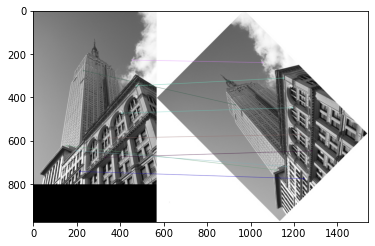

In [19]:
# Draw the best 10 matches.
nBestMatches = 10
matching_des_des_45 = cv.drawMatches(img_gray, kp, img_45_gray, kp_45,
                        matches_des_des_45[:nBestMatches],
                        None,
                        flags = cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(matching_des_des_45)

In [14]:
kp_train = kp_45
kp_query = kp
for i in range (0, nBestMatches):
    print("match ", i, " info")
    print("\tdistance:", matches_des_des_45[i].distance)
    print("\tkeypoint in train: ID:", matches_des_des_45[i].trainIdx, " x:",
        kp_train[matches_des_des_45[i].trainIdx].pt[0], " y:",
        kp_train[matches_des_des_45[i].trainIdx].pt[1])
    print("\tkeypoint in query: ID:", matches_des_des_45[i].queryIdx, " x:",
        kp_query[matches_des_des_45[i].queryIdx].pt[0], " y:",
        kp_query[matches_des_des_45[i].queryIdx].pt[1])

match  0  info
	distance: 9.380831718444824
	keypoint in train: ID: 2443  x: 677.6952514648438  y: 773.8290405273438
	keypoint in query: ID: 661  x: 215.936279296875  y: 740.7075805664062
match  1  info
	distance: 9.69536018371582
	keypoint in train: ID: 2356  x: 663.0458984375  y: 571.4856567382812
	keypoint in query: ID: 1721  x: 348.70166015625  y: 587.2408447265625
match  2  info
	distance: 11.747340202331543
	keypoint in train: ID: 963  x: 487.3557434082031  y: 240.7156524658203
	keypoint in query: ID: 2328  x: 458.2902526855469  y: 229.1184539794922
match  3  info
	distance: 12.206555366516113
	keypoint in train: ID: 2080  x: 624.6528930664062  y: 447.94830322265625
	keypoint in query: ID: 2090  x: 408.8612060546875  y: 472.7430725097656
match  4  info
	distance: 12.961481094360352
	keypoint in train: ID: 1525  x: 549.510498046875  y: 733.697998046875
	keypoint in query: ID: 101  x: 153.5780487060547  y: 621.6638793945312
match  5  info
	distance: 13.0
	keypoint in train: ID: 175

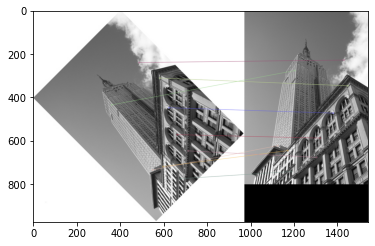

In [15]:
matches_des_45_des = bf.match(des_45, des)
matches_des_45_des = sorted(matches_des_45_des, key = lambda x:x.distance)
matching_des_45_des = cv.drawMatches(img_45_gray, kp_45, img_gray, kp,
                        matches_des_45_des[:nBestMatches],
                        None,
                        flags = cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(matching_des_45_des)

Similarity score between image empire and empire_45 using N=10

In [24]:
similarity_distance_des_des_45 = (sum(c.distance for c in matches_des_45_des[:10]) + 
                                   sum(c.distance for c in matches_des_des_45[:10])) / 2
similarity_distance_des_des_45

126.06704616546631

Similarity score between image empire and empire_45 using N=100

In [23]:
similarity_distance_des_des_45 = (sum(c.distance for c in matches_des_45_des[:100]) + 
                                   sum(c.distance for c in matches_des_des_45[:100])) / 2
similarity_distance_des_des_45

2133.7488403320312

Similarity score between image empire and empire_45 using N=1000

In [25]:
similarity_distance_des_des_45 = (sum(c.distance for c in matches_des_45_des[:1000]) + 
                                   sum(c.distance for c in matches_des_des_45[:1000])) / 2
similarity_distance_des_des_45

44554.510149002075

BFM for image empire and empire_zoomedout

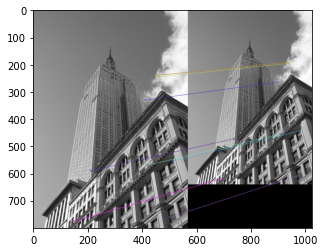

In [32]:
matches_des_des_zoomedout = bf.match(des, des_zoomedout)
matches_des_des_zoomedout = sorted(matches_des_des_zoomedout, key = lambda x:x.distance)
matching_des_des_zoomedout = cv.drawMatches(img_gray, kp, img_zoomedout_gray, kp_zoomedout, 
                                matches_des_des_zoomedout[:nBestMatches],
                                None,
                                flags = cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(matching_des_des_zoomedout)

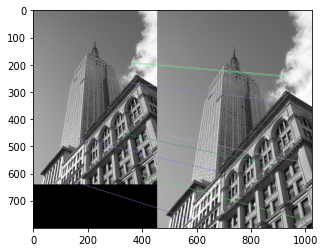

In [33]:
matches_des_zoomedout_des = bf.match(des_zoomedout, des)
matches_des_zoomedout_des = sorted(matches_des_zoomedout_des, key = lambda x:x.distance)
matching_des_zoomedout_des = cv.drawMatches(img_zoomedout_gray, kp_zoomedout, img_gray, kp,
                                matches_des_zoomedout_des[:nBestMatches],
                                None,
                                flags = cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(matching_des_zoomedout_des)

Similarity score between image empire and empire_zoomedout using N=10

In [35]:
similarity_distance_des_des_zoomedout = (sum(c.distance for c in matches_des_des_zoomedout[:10]) + 
                                   sum(c.distance for c in matches_des_zoomedout_des[:10])) / 2
similarity_distance_des_des_zoomedout

114.27689838409424

Similarity score between image empire and empire_zoomedout using N=100

In [36]:
similarity_distance_des_des_zoomedout = (sum(c.distance for c in matches_des_des_zoomedout[:100]) + 
                                   sum(c.distance for c in matches_des_zoomedout_des[:100])) / 2
similarity_distance_des_des_zoomedout

2003.3748254776

Similarity score between image empire and empire_zoomedout using N=1000

In [37]:
similarity_distance_des_des_zoomedout = (sum(c.distance for c in matches_des_des_zoomedout[:1000]) + 
                                   sum(c.distance for c in matches_des_zoomedout_des[:1000])) / 2
similarity_distance_des_des_zoomedout

44971.474358558655

BFM for the image emire and fisherman

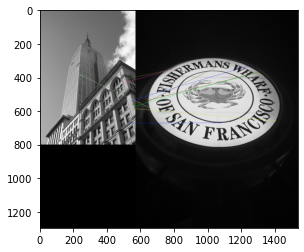

In [38]:
matches_des_des_another = bf.match(des, des_another)
matches_des_des_another = sorted(matches_des_des_another, key = lambda x:x.distance)
matching_des_des_another = cv.drawMatches(img_gray, kp, img_another_gray, kp_another, 
                                matches_des_des_another[:nBestMatches],
                                None,
                                flags = cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(matching_des_des_another)

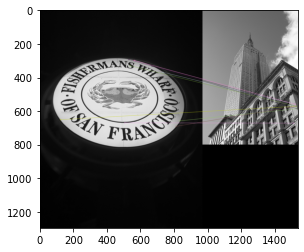

In [40]:
matches_des_another_des = bf.match(des_another, des)
matches_des_another_des = sorted(matches_des_another_des, key = lambda x:x.distance)
matching_des_another_des = cv.drawMatches(img_another_gray, kp_another, img_gray, kp,
                                matches_des_another_des[:nBestMatches],
                                None,
                                flags = cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(matching_des_another_des)

Similarity score between image empire and fisherman using N=10

In [43]:
similarity_distance_des_des_another = (sum(c.distance for c in matches_des_another_des[:10]) + 
                                   sum(c.distance for c in matches_des_des_another[:10])) / 2
similarity_distance_des_des_another

861.1744499206543

Similarity score between image empire and fisherman using N=100

In [44]:
similarity_distance_des_des_another = (sum(c.distance for c in matches_des_another_des[:100]) + 
                                   sum(c.distance for c in matches_des_des_another[:100])) / 2
similarity_distance_des_des_another

17155.563915252686

Similarity score between image empire and fisherman using N=1000

In [45]:
similarity_distance_des_des_another = (sum(c.distance for c in matches_des_another_des[:1000]) + 
                                   sum(c.distance for c in matches_des_des_another[:1000])) / 2
similarity_distance_des_des_another

280631.7470436096